In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import spacy
import pickle
from IPython.display import display
from wordcloud import WordCloud as wc
import string
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
pd.set_option('display.max_rows', None)
plt.rcParams["figure.figsize"] = [20,10]
plt.style.use('seaborn')

In [2]:
mpl.__version__

'3.4.1'

In [3]:
def uniqueWords(list1): 
     # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    
    return unique_list

In [4]:
def lyricsToWords(song,sp):
    doc = sp(song)
    normalized = " ".join([token.lemma_ for token in doc if not token.is_stop])
    return normalized

In [5]:
def createDecades(df):
    years = []
    decades = []
    df['release_date'].fillna(0)
    df['release_date'] = df['release_date'].astype("str")
    for i in df.index:
        years.append(df['release_date'].str.split("-")[i][0])
    df['year'] = years
    df['year'] = df['year'].astype("int")

    for year in df['year']:
        if 1980 <= year < 1990:
            decades.append("80s")
        if 1990 <= year < 2000:
            decades.append("90s")
        if 2000 <= year :
            decades.append("00s")
    df['decade'] = decades
    return df

In [6]:
cleanedlyrics_df = pickle.load(open('metallica_clean.pkl', "rb"))

In [7]:
spotify_df = pd.read_csv('../spotify/metallica_spotify.csv')

In [8]:
#Stores unique words of each lyrics song into a new column called words 
#list used to store the words
sp = spacy.load('en_core_web_sm')
words = []
#iterate trought each lyric and split unique words appending the result into the words list
cleanedlyrics_df = cleanedlyrics_df.reset_index(drop=True)
for song in cleanedlyrics_df['lyrics'].tolist():
    #print("word is " + word + '\n')
    words.append(uniqueWords(lyricsToWords(song,sp).split()))
    #print(words[0])

#create the new column with the information of words lists 
cleanedlyrics_df['words'] = words

In [9]:
cleanedlyrics_df

album release_date                         title  \
0                    Kill ‘Em All   1983-07-25             The Four Horsemen   
1                    Kill ‘Em All   1983-07-25                      Whiplash   
2                    Kill ‘Em All   1983-07-25                    No Remorse   
3                    Kill ‘Em All   1983-07-25              Jump in the Fire   
4                    Kill ‘Em All   1983-07-25                Seek & Destroy   
5                    Kill ‘Em All   1983-07-25                Hit the Lights   
6              Ride the Lightning   1984-07-27          Fight Fire with Fire   
7              Ride the Lightning   1984-07-27                 Fade to Black   
8              Ride the Lightning   1984-07-27       For Whom the Bell Tolls   
9              Ride the Lightning   1984-07-27                Creeping Death   
10             Ride the Lightning   1984-07-27                        Escape   
11             Ride the Lightning   1984-07-27             Trapped Under Ice   
12             Ride the Lightning   1984-07-27            Ride the Lightning   
13              Master of Puppets   1986-03-03                  Damage, Inc.   
14              Master of Puppets   1986-03-03  The Thing That Should Not Be   
15              Master of Puppets   1986-03-03             Disposable Heroes   
16              Master of Puppets   1986-03-03                 Leper Messiah   
17              Master of Puppets   1986-03-03             Master of Puppets   
18              Master of Puppets   1986-03-03                       Battery   
19              Master of Puppets   1986-03-03     Welcome Home (Sanitarium)   
20         ...And Justice for All   1988-08-25           Eye of the Beholder   
21         ...And Justice for All   1988-08-25           Harvester of Sorrow   
22         ...And Justice for All   1988-08-25            The Shortest Straw   
23         ...And Justice for All   1988-08-25                     Blackened   
24         ...And Justice for All   1988-08-25             To Live Is to Die   
25         ...And Justice for All   1988-08-25     The Frayed Ends of Sanity   
26         ...And Justice for All   1988-08-25        ...And Justice for All   
27         ...And Justice for All   1988-08-25                     Dyers Eve   
28         ...And Justice for All   1989-08-25                           One   
29                      Metallica   1991-08-12           My Friend of Misery   
30                      Metallica   1991-08-12              Holier Than Thou   
31                      Metallica   1991-08-12             Through the Never   
32                      Metallica   1991-08-12           The God That Failed   
33                      Metallica   1991-08-12           The Struggle Within   
34                      Metallica   1991-08-12          Nothing Else Matters   
35                      Metallica   1991-08-12               Of Wolf and Man   
36                      Metallica   1991-08-12             Don’t Tread on Me   
37                      Metallica   1991-08-12                 Enter Sandman   
38                      Metallica   1991-08-12                  Sad But True   
39                      Metallica   1991-08-12           Wherever I May Roam   
40                      Metallica   1991-10-28                The Unforgiven   
41                           Load   1996-06-04               Poor Twisted Me   
42                           Load   1996-06-04                  Thorn Within   
43                           Load   1996-06-04                          Cure   
44                           Load   1996-06-04                        Ronnie   
45                           Load   1996-06-04                         2 X 4   
46                           Load   1996-06-04               Wasting My Hate   
47                           Load   1996-06-04          The House Jack Built   
48                           Load   1996-06-04                Ain’t My Bitch   
49                          

In [10]:
cleanedlyrics_df = createDecades(cleanedlyrics_df)

In [11]:
words_80s = []
words_90s = []
words_00s = []
for index, row in cleanedlyrics_df.iterrows():
        if row['decade'] == '80s':
            for word in row['words']:
                words_80s.append(word)
        elif row['decade'] == '90s':
            for word in row['words']:
                words_90s.append(word)
        elif row['decade'] == '00s':
            for word in row['words']:
                words_00s.append(word)

In [12]:
words_80s_string = ""
separator = " "
words_80s_string = separator.join(words_80s)

words_90s_string = ""
separator = " "
words_90s_string = separator.join(words_90s)

words_00s_string = ""
separator = " "
words_00s_string = separator.join(words_00s)

## Wordcloud

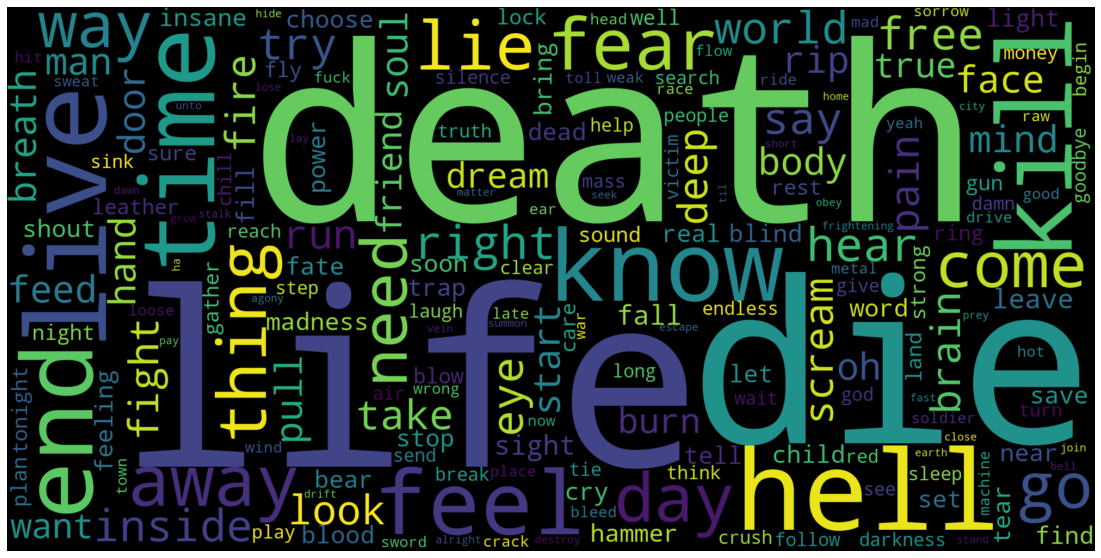

In [13]:
wordcloud = wc(background_color="black", width=2000, height=1000).generate(words_80s_string)
fig = plt.figure()
fig.set_size_inches(20,10)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

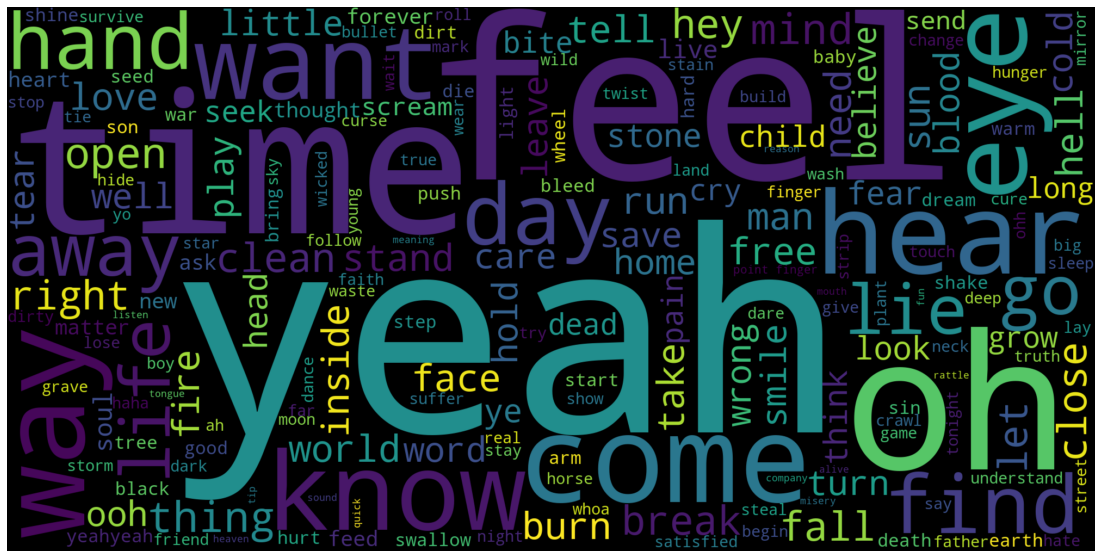

In [14]:
wordcloud = wc(background_color="black", width=2000, height=1000).generate(words_90s_string)
fig = plt.figure()
fig.set_size_inches(20,10)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

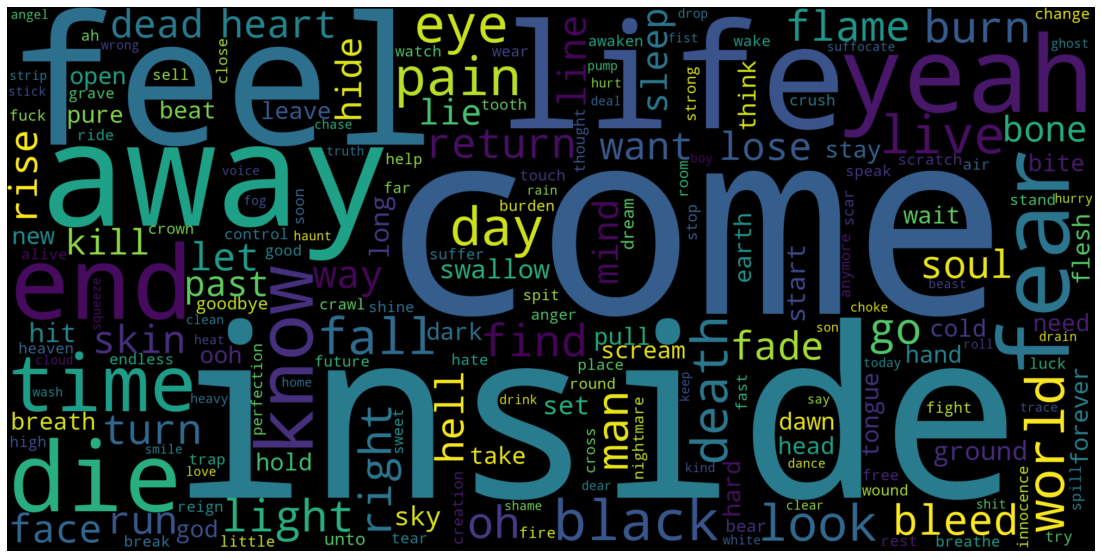

In [15]:
wordcloud = wc(background_color="black", width=2000, height=1000).generate(words_00s_string)
fig = plt.figure()
fig.set_size_inches(20,10)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Sentiment

In [16]:
for x in range(len(cleanedlyrics_df)):
    cleanedlyrics_df['lyrics_with_sentences'].iloc[x] = (cleanedlyrics_df['lyrics_with_sentences'].iloc[x]).split('.')

/home/mindcriminal/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
for x in range(len(cleanedlyrics_df)):
    for index, value in enumerate(cleanedlyrics_df['lyrics_with_sentences'].iloc[x]): 
        if value == '':
            cleanedlyrics_df['lyrics_with_sentences'].iloc[x].pop(index)

In [18]:
negative = []
neutral = []
positive = []
compound = []

cleanedlyrics_df['negative'] = np.nan
cleanedlyrics_df['neutral'] = np.nan
cleanedlyrics_df['positive'] = np.nan
cleanedlyrics_df['compound'] = np.nan

sid = SentimentIntensityAnalyzer()

#for i in cleanedlyrics_df.index:
for x in range(len(cleanedlyrics_df)):
    for y in range(len(cleanedlyrics_df['lyrics_with_sentences'].iloc[x])):
        scores = sid.polarity_scores(str(cleanedlyrics_df['lyrics_with_sentences'].iloc[y]))
        #print(str((cleanedlyrics_df['lyrics_with_sentences'].iloc[x])[y]))
        #print(scores)
        negative.append(scores['neg'])
        neutral.append(scores['neu'])
        positive.append(scores['pos'])
        compound.append(scores['compound'])
        
    cleanedlyrics_df['negative'].iloc[x] = sum(negative)/len(negative)
    cleanedlyrics_df['neutral'].iloc[x] = sum(neutral)/len(neutral)
    cleanedlyrics_df['positive'].iloc[x] = sum(positive)/len(positive)
    cleanedlyrics_df['compound'].iloc[x] = sum(compound)/len(compound)
    
    negative = []
    neutral = []
    positive = []
    compound = []

In [19]:
#means_df = cleanedlyrics_df.groupby(['decade']).mean()
#labels = ['00s', '80s', '90s']
#x = np.arange(len(labels))  # the label locations
#width = 0.35  # the width of the bars
#fig, ax = plt.subplots()
#fig.set_size_inches(15,5)
#
#positives = []
#negatives = []
#for y in range(len(means_df)):
#    positives.append(means_df.iloc[y]['positive'])
#    negatives.append(means_df.iloc[y]['negative'])
#
##for name, group in means_df.groupby('decade'):
#rects1 = ax.bar(x - width/2, positives, width, label='positive')
#rects2 = ax.bar(x + width/2, negatives, width, label='negative')
#
## Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Valences')
#ax.set_title('Sentiment By Decade')
#ax.set_xticks(x)
#ax.set_xticklabels(labels)
#ax.legend()
#
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
#
#fig.tight_layout()
#
##plt.title("Lyrics Sentiments by Decade")
##plt.xlabel('Positive Valence')
##plt.ylabel('Negative  Valence')
#
#plt.show()

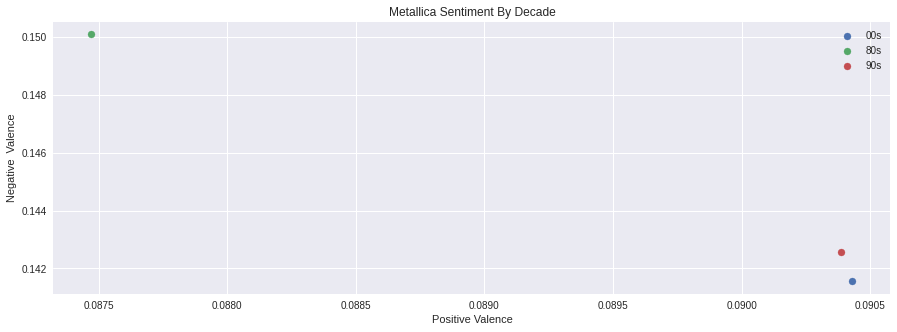

In [21]:
means_df = cleanedlyrics_df.groupby(['decade']).mean()

fig = plt.figure()
fig.set_size_inches(15,5)

for name, group in means_df.groupby('decade'):
    plt.scatter(group['positive'],group['negative'],label=name)
    plt.legend()

plt.title("Metallica Sentiment By Decade")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')

plt.show()

## Spotify

In [22]:
spotify_df.sort_values(by=['release_date'], inplace=True, ignore_index=True)

In [23]:
spotify_df

name  duration_ms  popularity  \
0                  Hit The Lights (Remastered)       255866          49   
1               The Four Horsemen (Remastered)       432546          55   
2                     Motorbreath (Remastered)       187840          48   
3                Jump In The Fire (Remastered)       281293          47   
4     (Anesthesia)--Pulling Teeth (Remastered)       254560          45   
5                        Whiplash (Remastered)       248546          51   
6                    Phantom Lord (Remastered)       301293          44   
7                      No Remorse (Remastered)       386560          45   
8                  Seek & Destroy (Remastered)       414720          60   
9                   Metal Militia (Remastered)       311466          45   
10              The Call Of Ktulu (Remastered)       533493          44   
11                 Creeping Death (Remastered)       395706          47   
12                         Escape (Remastered)       263866          43   
13              Trapped Under Ice (Remastered)       244066          44   
14        For Whom The Bell Tolls (Remastered)       309973          52   
15             Ride The Lightning (Remastered)       396986          49   
16           Fight Fire With Fire (Remastered)       284506          46   
17                  Fade To Black (Remastered)       417226          49   
18                        Battery (Remastered)       312360          47   
19              Master Of Puppets (Remastered)       515386          49   
20   The Thing That Should Not Be (Remastered)       396106          44   
21      Welcome Home (Sanitarium) (Remastered)       387146          46   
22              Disposable Heroes (Remastered)       496626          44   
23                  Leper Messiah (Remastered)       339880          43   
24                          Orion (Remastered)       507226          44   
25                   Damage, Inc. (Remastered)       332466          42   
26      The Frayed Ends of Sanity (Remastered)       463158          42   
27                      Dyers Eve (Remastered)       313045          47   
28              To Live Is to Die (Remastered)       588381          47   
29            Harvester of Sorrow (Remastered)       345283          56   
30                      Blackened (Remastered)       402143          56   
31                            One (Remastered)       446145          46   
32            Eye of the Beholder (Remastered)       385986          43   
33         ...And Justice for All (Remastered)       585506          55   
34             The Shortest Straw (Remastered)       395101          43   
35                         The Struggle Within       233893          47   
36                         My Friend Of Misery       409640          51   
37                         The God That Failed       308533          51   
38                             Of Wolf And Man       256600          54   
39                           Through The Never       244400          53   
40                        Nothing Else Matters       388733          70   
41                         Wherever I May Roam       404240          63   
42                              The Unforgiven       387133          66   
43                            Holier Than Thou       227733          53   
44                                Sad But True       324560          65   
45                               Enter Sandman       331573          75   
46                           Don't Tread On Me       240293          56   
47                             Poor Twisted Me       240000          38   
48                             The Outlaw Torn       588600          42   
49                                      Ronnie       317200          39   
50                                Thorn Within       351560          37   
51                                   Mama Said       319600          44   
52                             Wasting My Hate       237440        

In [24]:
track_features = pd.DataFrame(spotify_df[['duration_ms','popularity','danceability','energy','key','loudness','mode',\
                           'speechiness','acousticness','instrumentalness','liveness','valence',\
                           'tempo','time_signature']])

In [25]:
track_features

duration_ms  popularity  danceability  energy  key  loudness  mode  \
0         255866          49         0.249   0.970    4    -5.535     0   
1         432546          55         0.222   0.938    0    -6.910     1   
2         187840          48         0.289   0.938    1    -6.083     1   
3         281293          47         0.290   0.911    5    -5.667     0   
4         254560          45         0.224   0.886    7    -7.619     1   
5         248546          51         0.386   0.911    4    -6.474     0   
6         301293          44         0.212   0.973    2    -5.307     1   
7         386560          45         0.296   0.915    9    -5.979     1   
8         414720          60         0.439   0.963    9    -5.508     1   
9         311466          45         0.166   0.956    9    -5.307     1   
10        533493          44         0.301   0.935    9    -7.584     0   
11        395706          47         0.310   0.977    6    -5.478     0   
12        263866          43         0.267   0.937    9    -5.841     1   
13        244066          44         0.242   0.989    9    -5.298     1   
14        309973          52         0.512   0.860    0    -6.145     1   
15        396986          49         0.265   0.973    9    -6.129     1   
16        284506          46         0.280   0.986    0    -7.012     1   
17        417226          49         0.256   0.929    7    -6.667     1   
18        312360          47         0.480   0.923   11    -8.793     0   
19        515386          49         0.539   0.828    4    -9.108     0   
20        396106          44         0.679   0.716    9   -10.140     1   
21        387146          46         0.309   0.767    0    -9.676     1   
22        496626          44         0.264   0.931    4    -7.615     0   
23        339880          43         0.380   0.800    4    -8.617     1   
24        507226          44         0.367   0.672    9   -10.014     1   
25        332466          42         0.366   0.848   11   -10.575     0   
26        463158          42         0.483   0.909    4    -7.296     0   
27        313045          47         0.404   0.948    6    -7.252     0   
28        588381          47         0.432   0.624   11    -8.976     0   
29        345283          56         0.656   0.864    4    -7.895     0   
30        402143          56         0.435   0.853    4    -7.341     0   
31        446145          46         0.438   0.687    7    -9.150     1   
32        385986          43         0.639   0.838   11    -8.179     0   
33        585506          55         0.382   0.793    4    -7.342     0   
34        395101          43         0.432   0.906    9    -7.958     1   
35        233893          47         0.475   0.924    0    -7.351     1   
36        409640          51         0.584   0.816    9    -8.101     0   
37        308533          51         0.563   0.800    8    -6.565     1   
38        256600          54         0.627   0.752    5    -7.691     1   
39        244400          53         0.391   0.929    4    -6.773     0   
40        388733          70         0.558   0.364    4   -11.258     0   
41        404240          63         0.554   0.816   11    -7.871     1   
42        387133          66         0.539   0.597    7    -9.581     1   
43        227733          53         0.480   0.959    5    -6.227     1   
44        324560          65         0.632   0.845    7    -6.336     1   
45        331573          75         0.579   0.824    6    -8.710     0   
46        240293          56         0.674   0.833    2    -7.625     1   
47        240000          38         0.477   0.919    1    -4.741     1   
48        588600          42         0.621   0.725    1    -6.802     1   
49        317200          39         0.552   0.907    1    -5.476     1   
50        351560          37         0.526   0.897   10    -5.848     0   
51        319600          44         0.451   0.497    8    -7.694     0   
52        237440          39  

In [26]:
# Track feature stats
display(np.round(track_features.describe()))

duration_ms  popularity  danceability  energy    key  loudness   mode  \
count        107.0       107.0         107.0   107.0  107.0     107.0  107.0   
mean      372266.0        46.0           0.0     1.0    5.0      -6.0    1.0   
std        92612.0         8.0           0.0     0.0    3.0       2.0    0.0   
min       187840.0        33.0           0.0     0.0    0.0     -11.0    0.0   
25%       310720.0        40.0           0.0     1.0    2.0      -7.0    0.0   
50%       385466.0        45.0           0.0     1.0    5.0      -5.0    1.0   
75%       428759.0        52.0           1.0     1.0    8.0      -4.0    1.0   
max       597720.0        75.0           1.0     1.0   11.0      -0.0    1.0   

       speechiness  acousticness  instrumentalness  liveness  valence  tempo  \
count        107.0         107.0             107.0     107.0    107.0  107.0   
mean           0.0           0.0               0.0       0.0      0.0  126.0   
std            0.0           0.0               0.0       0.0      0.0   30.0   
min            0.0           0.0               0.0       0.0      0.0   78.0   
25%            0.0           0.0               0.0       0.0      0.0  102.0   
50%            0.0           0.0               0.0       0.0      0.0  122.0   
75%            0.0           0.0               0.0       0.0      1.0  143.0   
max            0.0           0.0               1.0       1.0      1.0  203.0   

       time_signature  
count           107.0  
mean              4.0  
std               0.0  
min               3.0  
25%               4.0  
50%               4.0  
75%               4.0  
max               4.0

duration_ms  popularity  danceability    energy       key  \
duration_ms          1.000000   -0.109847     -0.050225 -0.172475  0.010133   
popularity          -0.109847    1.000000      0.069355 -0.312057  0.157992   
danceability        -0.050225    0.069355      1.000000 -0.378998 -0.016892   
energy              -0.172475   -0.312057     -0.378998  1.000000 -0.060569   
key                  0.010133    0.157992     -0.016892 -0.060569  1.000000   
loudness             0.035478   -0.276470     -0.292288  0.658664 -0.117194   
mode                -0.211405   -0.158166      0.010721  0.040067 -0.198013   
speechiness         -0.006402    0.041108     -0.516695  0.346006 -0.013999   
acousticness         0.060292    0.289167      0.093387 -0.418146  0.041634   
instrumentalness     0.148171   -0.089344     -0.170460 -0.066537  0.117224   
liveness            -0.123841   -0.206903      0.018488 -0.062417 -0.080328   
valence             -0.198368    0.029546      0.369275  0.050853  0.040389   
tempo                0.002931    0.175123     -0.477951  0.143269  0.052700   
time_signature      -0.062539   -0.022669     -0.110791  0.389077  0.132203   

                  loudness      mode  speechiness  acousticness  \
duration_ms       0.035478 -0.211405    -0.006402      0.060292   
popularity       -0.276470 -0.158166     0.041108      0.289167   
danceability     -0.292288  0.010721    -0.516695      0.093387   
energy            0.658664  0.040067     0.346006     -0.418146   
key              -0.117194 -0.198013    -0.013999      0.041634   
loudness          1.000000 -0.037235     0.067869     -0.260077   
mode             -0.037235  1.000000     0.061783     -0.091152   
speechiness       0.067869  0.061783     1.000000      0.095818   
acousticness     -0.260077 -0.091152     0.095818      1.000000   
instrumentalness -0.371474 -0.091210     0.035204     -0.006550   
liveness         -0.056691  0.166863    -0.111885      0.006739   
valence          -0.023499 -0.055337    -0.348810     -0.148340   
tempo             0.242853 -0.036550     0.444430      0.102561   
time_signature    0.162781 -0.064566     0.094593     -0.346331   

                  instrumentalness  liveness   valence     tempo  \
duration_ms               0.148171 -0.123841 -0.198368  0.002931   
popularity               -0.089344 -0.206903  0.029546  0.175123   
danceability             -0.170460  0.018488  0.369275 -0.477951   
energy                   -0.066537 -0.062417  0.050853  0.143269   
key                       0.117224 -0.080328  0.040389  0.052700   
loudness                 -0.371474 -0.056691 -0.023499  0.242853   
mode                     -0.091210  0.166863 -0.055337 -0.036550   
speechiness               0.035204 -0.111885 -0.348810  0.444430   
acousticness             -0.006550  0.006739 -0.148340  0.102561   
instrumentalness          1.000000  0.163680 -0.127365 -0.066076   
liveness                  0.163680  1.000000  0.096898 -0.151933   
valence                  -0.127365  0.096898  1.000000 -0.110245   
tempo                    -0.066076 -0.151933 -0.110245  1.000000   
time_signature            0.100331 -0.186078  0.199431  0.038153   

                  time_signature  
duration_ms            -0.062539  
popularity             -0.022669  
danceability           -0.110791  
energy                  0.389077  
key                     0.132203  
loudness                0.162781  
mode                   -0.064566  
speechiness             0.094593  
acousticness           -0.346331  
instrumentalness        0.100331  
liveness               -0.186078  
valence                 0.199431  
tempo                   0.038153  
time_signature          1.000000

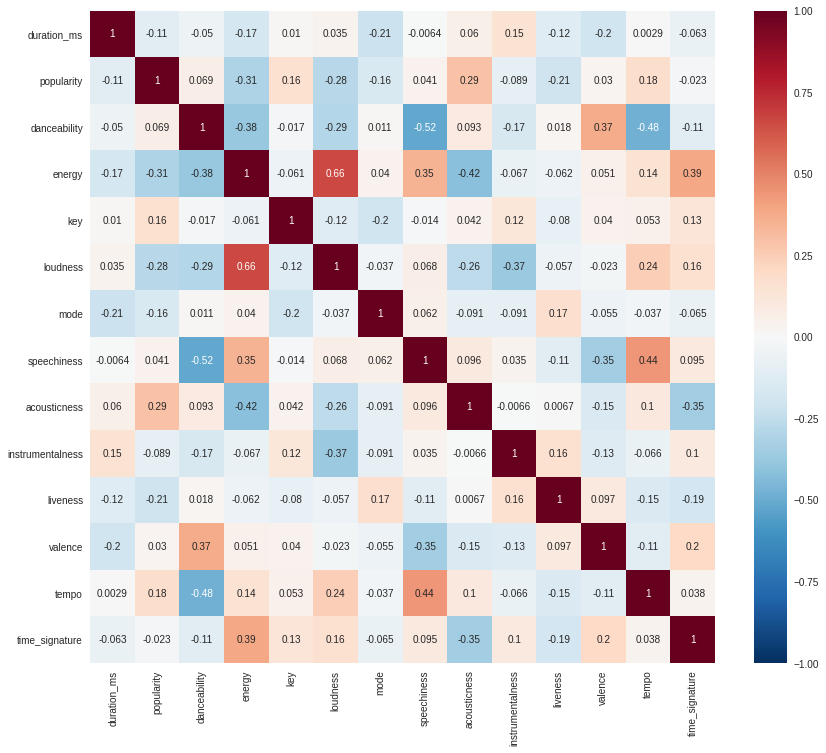

In [27]:
# Track feature correlations and heatmap
correlation = track_features.corr()
display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")